## Prediction using Unsupervised ML

#### Task 2

#### Author: Fahad Munir

This task is a part of the internship with The Sparks Foundation. In this task we have to analyze the Iris dataset with different Unsupervised machine learning techniques.

In [1]:
#Importing libraries and Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#### Reading the dataset

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
data.shape

(150, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


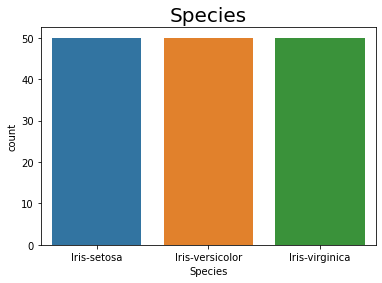

In [8]:
sns.countplot(x='Species',data=data)
plt.title('Species',fontsize=20)
plt.show()

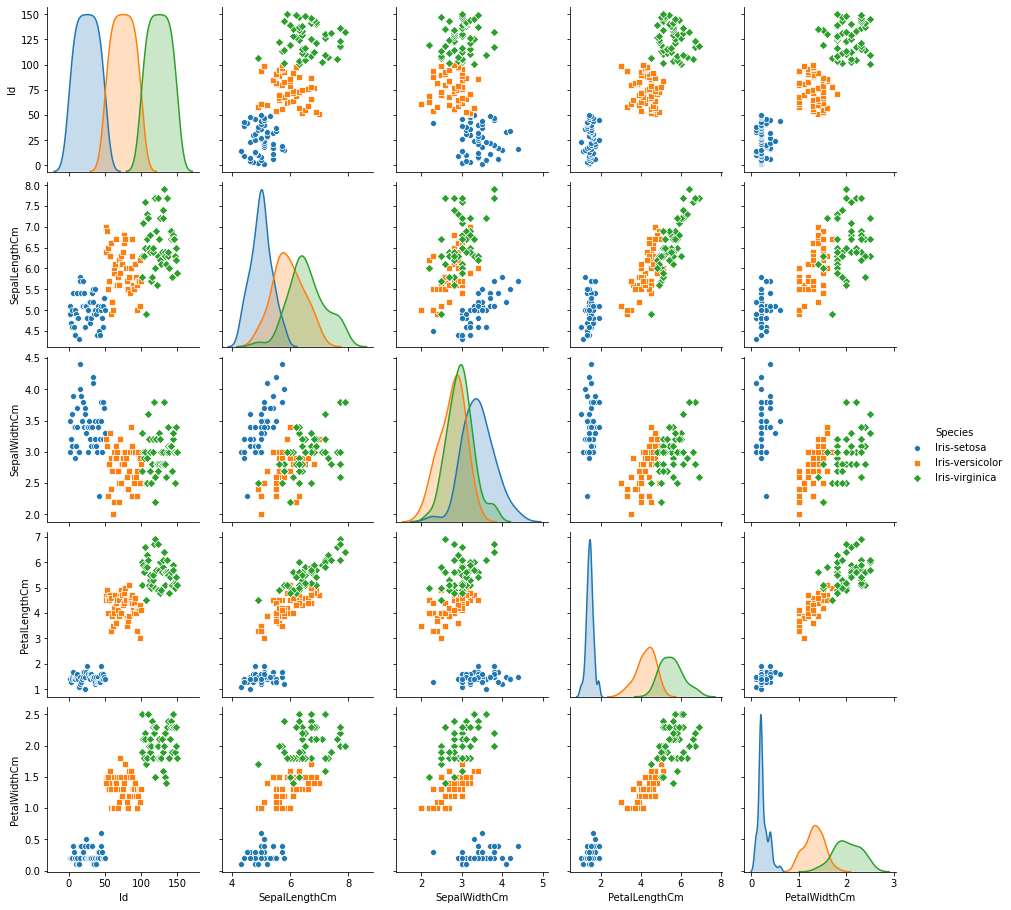

In [9]:
sns.pairplot(data,hue='Species',markers=['o','s','D'])

In [10]:
x = data.iloc[:,2:4].values
x

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4],
       [3.9, 1.7],
       [3.4, 1.4],
       [3.4, 1.5],
       [2.9, 1.4],
       [3.1, 1.5],
       [3.7, 1.5],
       [3.4, 1.6],
       [3. , 1.4],
       [3. , 1.1],
       [4. , 1.2],
       [4.4, 1.5],
       [3.9, 1.3],
       [3.5, 1.4],
       [3.8, 1.7],
       [3.8, 1.5],
       [3.4, 1.7],
       [3.7, 1.5],
       [3.6, 1. ],
       [3.3, 1.7],
       [3.4, 1.9],
       [3. , 1.6],
       [3.4, 1.6],
       [3.5, 1.5],
       [3.4, 1.4],
       [3.2, 1.6],
       [3.1, 1.6],
       [3.4, 1.5],
       [4.1, 1.5],
       [4.2, 1.4],
       [3.1, 1.5],
       [3.2, 1.2],
       [3.5, 1.3],
       [3.1, 1.5],
       [3. , 1.3],
       [3.4, 1.5],
       [3.5, 1.3],
       [2.3, 1.3],
       [3.2, 1.3],
       [3.5, 1.6],
       [3.8, 1.9],
       [3. , 1.4],
       [3.8, 1.6],
       [3.2, 1.4],
       [3.7, 1.5],
       [3.3, 1.4],
       [3.2, 4.7],
       [3.2, 4.5],
       [3.1,

### Elbow method to calculate optimum value of k

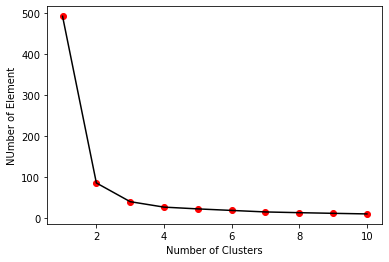

In [11]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmean = KMeans(n_clusters=i,init="k-means++",random_state = 42)
    kmean.fit(x)
    wcss.append(kmean.inertia_)
k = range(1,11)
plt.scatter(k,wcss,c='red')
plt.plot(k,wcss,c='black')
plt.xlabel("Number of Clusters")
plt.ylabel("NUmber of Element")
plt.show()
    

### Implement K-means with k=5

In [12]:
kmean = KMeans(n_clusters = 5, init = 'k-means++', random_state=42)
y_pred = kmean.fit_predict(x)

In [13]:
y_pred

array([3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 3, 0, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4,
       1, 1, 4, 1, 1, 1, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 1, 1, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 1, 4, 4, 1, 1, 4, 4, 1, 1, 1, 4, 1])

In [14]:
#Let's compare the values
text = x[:,0]
text = text.reshape(150,1)
compare = np.append(arr = y_pred.reshape(150,1),values=text,axis=1)
print(compare)

[[3.  3.5]
 [3.  3. ]
 [3.  3.2]
 [3.  3.1]
 [0.  3.6]
 [0.  3.9]
 [3.  3.4]
 [3.  3.4]
 [3.  2.9]
 [3.  3.1]
 [0.  3.7]
 [3.  3.4]
 [3.  3. ]
 [3.  3. ]
 [0.  4. ]
 [0.  4.4]
 [0.  3.9]
 [3.  3.5]
 [0.  3.8]
 [0.  3.8]
 [3.  3.4]
 [0.  3.7]
 [0.  3.6]
 [3.  3.3]
 [3.  3.4]
 [3.  3. ]
 [3.  3.4]
 [3.  3.5]
 [3.  3.4]
 [3.  3.2]
 [3.  3.1]
 [3.  3.4]
 [0.  4.1]
 [0.  4.2]
 [3.  3.1]
 [3.  3.2]
 [3.  3.5]
 [3.  3.1]
 [3.  3. ]
 [3.  3.4]
 [3.  3.5]
 [3.  2.3]
 [3.  3.2]
 [3.  3.5]
 [0.  3.8]
 [3.  3. ]
 [0.  3.8]
 [3.  3.2]
 [0.  3.7]
 [3.  3.3]
 [1.  3.2]
 [1.  3.2]
 [1.  3.1]
 [2.  2.3]
 [1.  2.8]
 [1.  2.8]
 [1.  3.3]
 [2.  2.4]
 [1.  2.9]
 [2.  2.7]
 [2.  2. ]
 [2.  3. ]
 [2.  2.2]
 [1.  2.9]
 [2.  2.9]
 [1.  3.1]
 [1.  3. ]
 [2.  2.7]
 [2.  2.2]
 [2.  2.5]
 [1.  3.2]
 [2.  2.8]
 [1.  2.5]
 [1.  2.8]
 [2.  2.9]
 [1.  3. ]
 [1.  2.8]
 [1.  3. ]
 [1.  2.9]
 [2.  2.6]
 [2.  2.4]
 [2.  2.4]
 [2.  2.7]
 [1.  2.7]
 [1.  3. ]
 [1.  3.4]
 [1.  3.1]
 [2.  2.3]
 [2.  3. ]
 [2.  2.5]
 [2.  2.6]

### Visualizing the Clusters

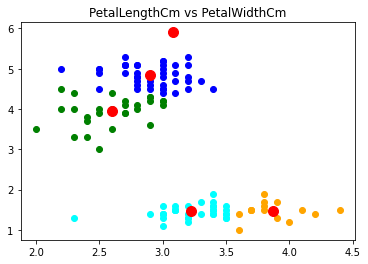

In [26]:
plt.scatter(x[y_pred == 0,0], x[y_pred == 0,1],c='orange',label='cluster1')
plt.scatter(x[y_pred == 1,0], x[y_pred == 1,1],c='blue',label='cluster2')
plt.scatter(x[y_pred == 2,0], x[y_pred == 2,1],c='green',label='cluster3')
plt.scatter(x[y_pred == 3,0], x[y_pred == 3,1],c='cyan',label='cluster4')

plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=100,c='Red')
plt.title('PetalLengthCm vs PetalWidthCm')
plt.show()

### Using Dendogram to find the optimal number of clusters

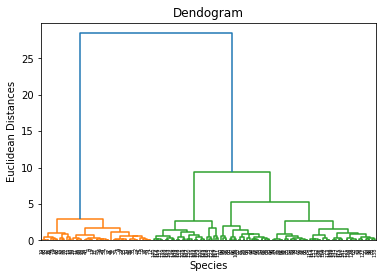

In [16]:
# Hierarchical Clustering
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendogram')
plt.xlabel('Species')
plt.ylabel('Euclidean Distances')
plt.show()

### Training the hierarchical clustering model 

In [17]:
#Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

### Visualising the Clusters

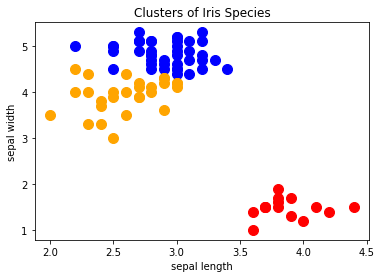

In [18]:
plt.scatter(x[y_pred == 0,0], x[y_pred == 0, 1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1,0], x[y_pred == 1, 1],
           s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2,0], x[y_pred == 2, 1],
           s = 100, c = 'orange', label = 'Iris-virginica')

plt.title('Clusters of Iris Species')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

#### Conclusion
We can infer from the above visualization, Iris-setosa has higher sepal length but lower sepal width. However, the Iris-versicolour and Iris-verginica has higher sepal width but lower sepal length than Iris-setosa.